In [1]:
"""Create a sample face landmarks dataset.

Adapted from dlib/python_examples/face_landmark_detection.py
See this file for more explanation.

Download a trained facial shape predictor from:
    http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
"""
import dlib
import glob
import csv
from skimage import io

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
num_landmarks = 68

with open('face_landmarks.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    header = ['image_name']
    for i in range(num_landmarks):
        header += ['part_{}_x'.format(i), 'part_{}_y'.format(i)]

    csv_writer.writerow(header)

    for f in glob.glob('./faces_resize/*.jpg'):
        img = io.imread(f)
        dets = detector(img, 1)  # face detection

        # ignore all the files with no or more than one faces detected.
        if len(dets) == 1:
            row = [f]

            d = dets[0]
            # Get the landmarks/parts for the face in box d.
            shape = predictor(img, d)
            for i in range(num_landmarks):
                part_i_x = shape.part(i).x
                part_i_y = shape.part(i).y
                row += [part_i_x, part_i_y]

            csv_writer.writerow(row)


In [2]:
import os
from skimage import io, transform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

plt.ion() # interactive mode

In [3]:
landmarks_frame = pd.read_csv('./face_landmarks.csv')

n = 5
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2) # (68, 2)

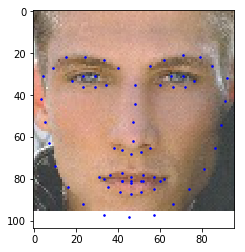

In [5]:
# landmarks 찍는 방법

def show_landmarks(image, landmarks):
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='b')
    plt.pause(0.001)

plt.figure()
show_landmarks(io.imread(os.path.join('', img_name)), landmarks)
plt.show()